## Business Understanding
The public 2022 Stack overflow survey was conducted from may 2022 to june 2022. The survey had questions relating to basic information, education, work, technology used , demographic information etc. The number of respondents is nearly 73000.
### Survey Analysis Questions:

- What is the percentage of work from home or remote work promoted by the companies country-wise? Which country provides the highest remote work option?
- What is the popular language preferred to work in?
- What is the Education Level of the respondents who spend most time searching for answers or solutions to problems encountered at work?

## Data Understanding
The Dataset has more than 70000 repondents corresponding to 70000 instances and about 80 questions corresponding to 79 attributes. There are 73 categorical attributes and 4 numerical attributes and 2 attributes with all values NaN. 


## Prepare Data
The Data has to be preprocessed by handling missing values, categorical values and removing the attributes with all missing values. 

### Load the Dataset

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
df=pd.DataFrame(pd.read_csv('survey_results_public.csv'))
schema=pd.DataFrame(pd.read_csv('survey_results_schema.csv'))
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [42]:
df.describe()

,ResponseId,CompTotal,VCHostingPersonal use,VCHostingProfessional use,WorkExp,ConvertedCompYearly
count,73268.000000,3.842200e+04,0.0,0.0,36769.000000,3.807100e+04
mean,36634.500000,2.342434e+52,NaN,NaN,10.242378,1.707613e+05
std,21150.794099,4.591478e+54,NaN,NaN,8.706850,7.814132e+05
min,1.000000,0.000000e+00,NaN,NaN,0.000000,1.000000e+00
25%,18317.750000,3.000000e+04,NaN,NaN,4.000000,3.583200e+04
50%,36634.500000,7.750000e+04,NaN,NaN,8.000000,6.784500e+04
75%,54951.250000,1.540000e+05,NaN,NaN,15.000000,1.200000e+05
max,73268.000000,9.000000e+56,NaN,NaN,50.000000,5.000000e+07


In [2]:
schema.head()

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR


In [3]:
#No. of rows and cols
print("The no. of rows :",df.shape[0])
print("The no. of columns :",df.shape[1])

The no. of rows : 73268
The no. of columns : 79


### The number of instances in the dataset is 73268 and 79 attributes. 

In [4]:
df.isnull().sum()
print('The columns with no missing values:\n ', df.columns[df.isnull().mean()==0])

The columns with no missing values:
  Index(['ResponseId', 'MainBranch'], dtype='object')


### The attributes with no missing values are ResponseId and Mainbranch

In [5]:
df.isnull().sum()
print('The columns with missing values:\n ', df.columns[df.isnull().mean()!=0])

The columns with missing values:
  Index(['Employment', 'RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode',
       'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro',
       'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [6]:
print('The columns that have 75% missing values',df.columns[df.isnull().mean()>0.75])

The columns that have 75% missing values Index(['VCHostingPersonal use', 'VCHostingProfessional use'], dtype='object')


In [7]:
#print("There aflic.isnull().mean()==1.0]
df.columns[df.isnull().mean()==1.0]

Index(['VCHostingPersonal use', 'VCHostingProfessional use'], dtype='object')

### The attributes VCHostingPersonal use and VCHostingProfessional use has all the values NaN.

### The attributes are removed using drop command

In [8]:
df.drop(['VCHostingPersonal use'],axis=1,inplace=True)
df.drop(['VCHostingProfessional use'],axis=1,inplace=True)

In [9]:
df.columns[df.isnull().mean()==1.0]

Index([], dtype='object')

In [12]:
cols=df.columns[df.isnull().mean()>=0.5]

In [13]:
df.drop(cols,axis=1,inplace=True)

### The categorical values of interest namely RemoteWork and Country are handled using get_dummies

In [27]:
cols=['ResponseId','RemoteWork','Country']

In [29]:
dff=df[cols]
dff

,ResponseId,RemoteWork,Country
0,1,NaN,NaN
1,2,Fully remote,Canada
2,3,"Hybrid (some remote, some in-person)",United Kingdom of Great Britain and Northern I...
3,4,Fully remote,Israel
4,5,"Hybrid (some remote, some in-person)",United States of America
...,...,...,...
73263,73264,Fully remote,Nigeria
73264,73265,Full in-person,United States of America
73265,73266,"Hybrid (some remote, some in-person)",United States of America
73266,73267,"Hybrid (some remote, some in-person)",United Kingdom of Great Britain and Northern I...


In [33]:
print("Finding the categorical variables")
cat_df=dff.select_dtypes(include=['object']).copy()
cat_col_lst=cat_df.columns
cat_col_lst
len(cat_col_lst)
print(cat_col_lst)

Finding the categorical variables
Index(['RemoteWork', 'Country'], dtype='object')


### A function create_dummy_df is used to handle the categorical values

In [38]:
def create_dummy_df(df,cat_cols,dummy_na):
    for col in cat_cols:
        df=pd.concat([df.drop(col,axis=1),pd.get_dummies(df[col],prefix=col,prefix_sep='_',dummy_na=dummy_na)],axis=1)
        return df
df_new=create_dummy_df(cat_df,cat_col_lst,dummy_na=False)
    

In [39]:
df_new

,Country,RemoteWork_Full in-person,RemoteWork_Fully remote,"RemoteWork_Hybrid (some remote, some in-person)"
0,NaN,0,0,0
1,Canada,0,1,0
2,United Kingdom of Great Britain and Northern I...,0,0,1
3,Israel,0,1,0
4,United States of America,0,0,1
...,...,...,...,...
73263,Nigeria,0,1,0
73264,United States of America,1,0,0
73265,United States of America,0,0,1
73266,United Kingdom of Great Britain and Northern I...,0,0,1


In [13]:
df.describe()

,ResponseId,CompTotal,VCHostingPersonal use,VCHostingProfessional use,WorkExp,ConvertedCompYearly
count,73268.000000,3.842200e+04,0.0,0.0,36769.000000,3.807100e+04
mean,36634.500000,2.342434e+52,NaN,NaN,10.242378,1.707613e+05
std,21150.794099,4.591478e+54,NaN,NaN,8.706850,7.814132e+05
min,1.000000,0.000000e+00,NaN,NaN,0.000000,1.000000e+00
25%,18317.750000,3.000000e+04,NaN,NaN,4.000000,3.583200e+04
50%,36634.500000,7.750000e+04,NaN,NaN,8.000000,6.784500e+04
75%,54951.250000,1.540000e+05,NaN,NaN,15.000000,1.200000e+05
max,73268.000000,9.000000e+56,NaN,NaN,50.000000,5.000000e+07


# Question 1: What is the percentage of work from home or remote work promoted by the companies country wise? Which country provides the highest remote work option?

### Analyse the data to answer the question
The dataset is analysed for the category work from home from RemoteWork attribute. The percentage of respondent working from home, hybrid and in person is obtained and a pie chart is drawn for clear understanding.

In [42]:
df['RemoteWork']


0                                         NaN
1                                Fully remote
2        Hybrid (some remote, some in-person)
3                                Fully remote
4        Hybrid (some remote, some in-person)
                         ...                 
73263                            Fully remote
73264                          Full in-person
73265    Hybrid (some remote, some in-person)
73266    Hybrid (some remote, some in-person)
73267                            Fully remote
Name: RemoteWork, Length: 73268, dtype: object

In [43]:
cc=df['RemoteWork'].value_counts()/df.shape[0]


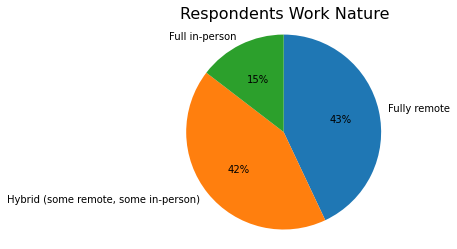

In [44]:
plt.title("Respondents Work Nature",fontsize=16)
plt.pie(cc,labels=cc.index,startangle=90,autopct="%.0f%%",counterclock=False)
plt.axis('square');

In [45]:
cc1=df['Country'].value_counts()/df.shape[0]
cc1[:10]

United States of America                                0.184842
India                                                   0.090613
Germany                                                 0.073634
United Kingdom of Great Britain and Northern Ireland    0.057187
Canada                                                  0.033985
France                                                  0.031774
Brazil                                                  0.028785
Poland                                                  0.023639
Netherlands                                             0.021223
Spain                                                   0.020759
Name: Country, dtype: float64

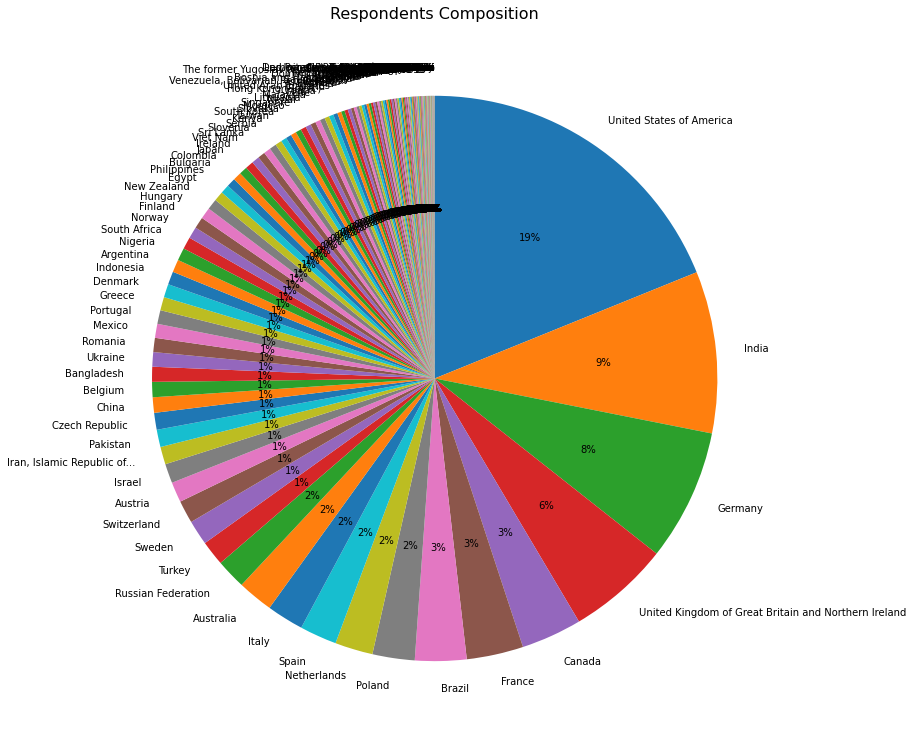

In [46]:
pi,ax=plt.subplots(figsize=[13,13])
plt.title("Respondents Composition",fontsize=16)
plt.pie(cc1,labels=cc1.index,startangle=90,autopct="%.0f%%",counterclock=False);


In [19]:
df['country_remotework']=df[df['RemoteWork']=='Fully remote'].Country
df['country_remotework'].value_counts()/df.shape[0]

United States of America                                0.092414
India                                                   0.026642
Germany                                                 0.021264
United Kingdom of Great Britain and Northern Ireland    0.020910
Canada                                                  0.017852
                                                          ...   
Congo, Republic of the...                               0.000014
Togo                                                    0.000014
Niger                                                   0.000014
Kuwait                                                  0.000014
Suriname                                                0.000014
Name: country_remotework, Length: 157, dtype: float64

In [20]:
count=df['country_remotework'].value_counts()/df.shape[0]
count

United States of America                                0.092414
India                                                   0.026642
Germany                                                 0.021264
United Kingdom of Great Britain and Northern Ireland    0.020910
Canada                                                  0.017852
                                                          ...   
Congo, Republic of the...                               0.000014
Togo                                                    0.000014
Niger                                                   0.000014
Kuwait                                                  0.000014
Suriname                                                0.000014
Name: country_remotework, Length: 157, dtype: float64

In [21]:
count1=count[:10]
count1

United States of America                                0.092414
India                                                   0.026642
Germany                                                 0.021264
United Kingdom of Great Britain and Northern Ireland    0.020910
Canada                                                  0.017852
Brazil                                                  0.017033
Poland                                                  0.010823
Spain                                                   0.009199
Russian Federation                                      0.006742
France                                                  0.006142
Name: country_remotework, dtype: float64

### Visualize the results

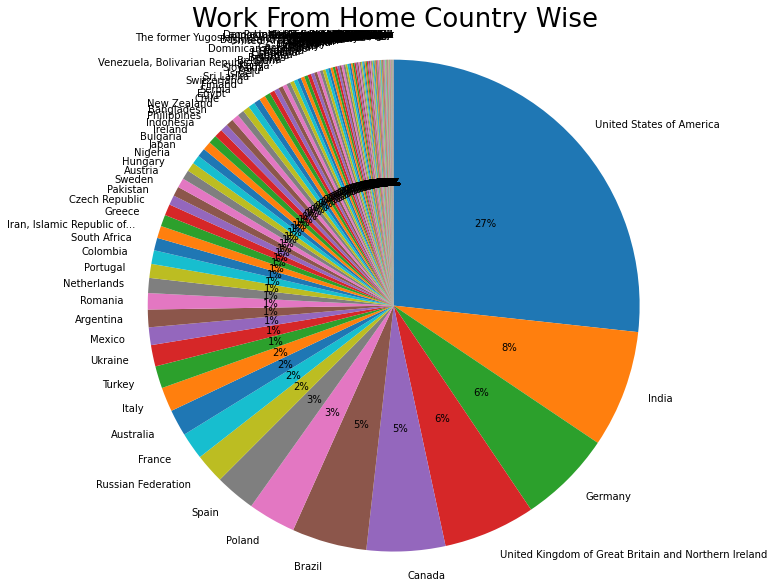

In [22]:

pi,ax=plt.subplots(figsize=[10,10])
plt.title("Work From Home Country Wise",fontsize=26) 
plt.pie(count,labels=count.index,startangle=90,counterclock=False,autopct="%.0f%%",pctdistance=0.5 );
plt.axis('square');

### Explanation of the results
### The countries providing remote work option country wise depicts that

- United States of America provides the highest percentage of 27%
- India at 8%,
- Germany and UK at 6%
- Canada and Brazil at 5% ,
- poland and spain at 3% and
- France,Russian Federation and Australia at 2%
 

# Question 2: What is the popular language preferred to work?

In [24]:
df=pd.DataFrame(pd.read_csv('E:/stackoverflow/survey_results_public.csv'))

In [25]:
df['DevType'].value_counts()/df.shape[0]

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                  0.097478
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                    0.072351
Developer, front-end                                                                                                                    

In [26]:
df3=df[df['DevType']=='Developer, full-stack']
count1=df3.LanguageWantToWorkWith.value_counts()
ct1=count1[:10]

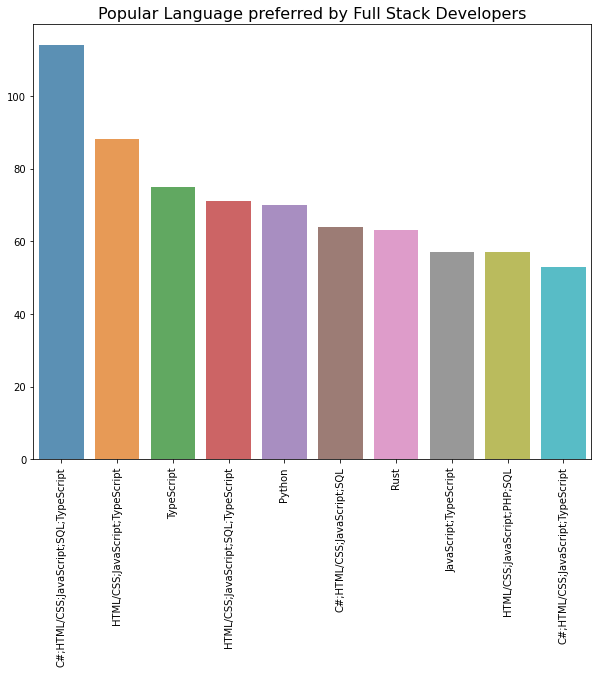

In [27]:
plt.figure(figsize=(10,8))
plt.title("Popular Language preferred by Full Stack Developers",fontsize=16)
sb.barplot(x=ct1.index,y=ct1.values,alpha=0.8)
plt.xticks(rotation=90)
plt.show()

In [28]:
df4=df[df['DevType']=='Developer, back-end']
count2=df4.LanguageWantToWorkWith.value_counts()
ct2=count2[:10]

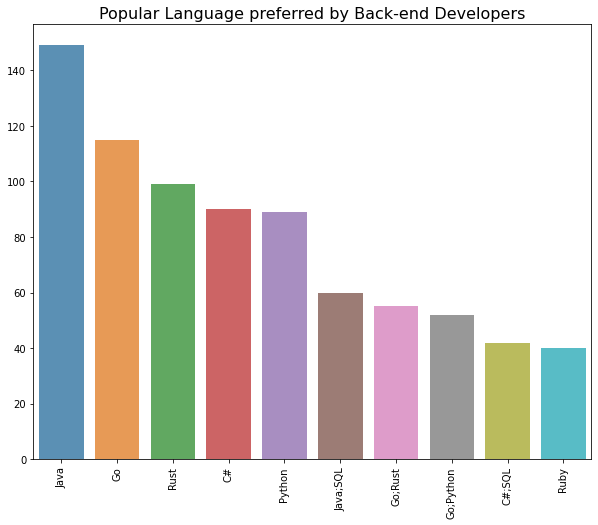

In [29]:
plt.figure(figsize=(10,8))
plt.title("Popular Language preferred by Back-end Developers",fontsize=16)
sb.barplot(x=ct2.index,y=ct2.values,alpha=0.8)
plt.xticks(rotation=90);

## The popular Languages to work with specified by the full stack developers are HTML/CSS/Javascript/TypeScript with C# and SQL. The top 5 popular languages preferred by backend developers are Java, GO, Rust, C# and Python.

## Question 3: What is the Education Level of the respondents who spends most time in searching for answers or solutions to problems encountered at work? 

In [31]:
df=pd.DataFrame(pd.read_csv('E:/stackoverflow/survey_results_public.csv'))

In [32]:
df.TimeSearching.value_counts()

30-60 minutes a day           13652
15-30 minutes a day           10122
60-120 minutes a day           6371
Less than 15 minutes a day     3528
Over 120 minutes a day         2525
Name: TimeSearching, dtype: int64

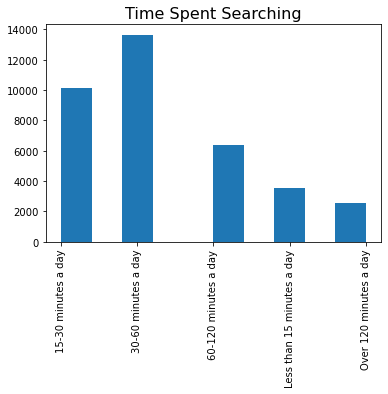

In [33]:
plt.title('Time Spent Searching',fontsize=16)
df5=df.dropna(subset=['TimeSearching'],axis=0)
plt.hist(data=df5,x='TimeSearching')
plt.xticks(rotation=90);


In [34]:
df5[df5['TimeSearching']=='Over 120 minutes a day'].RemoteWork.value_counts()

Fully remote                            1064
Hybrid (some remote, some in-person)     982
Full in-person                           473
Name: RemoteWork, dtype: int64

In [35]:
df5[df5['TimeSearching']=='Over 120 minutes a day'].EdLevel.value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          1226
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        612
Some college/university study without earning a degree                                 301
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     134
Associate degree (A.A., A.S., etc.)                                                     95
Other doctoral degree (Ph.D., Ed.D., etc.)                                              65
Professional degree (JD, MD, etc.)                                                      38
Something else                                                                          26
Primary/elementary school                                                               25
Name: EdLevel, dtype: int64

In [36]:
df5[df5['TimeSearching']=='30-60 minutes a day'].EdLevel.value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          6749
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       3382
Some college/university study without earning a degree                                1599
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     634
Associate degree (A.A., A.S., etc.)                                                    434
Other doctoral degree (Ph.D., Ed.D., etc.)                                             430
Professional degree (JD, MD, etc.)                                                     213
Something else                                                                         135
Primary/elementary school                                                               73
Name: EdLevel, dtype: int64

In [37]:
df_ed_ord=df.groupby(['EdLevel','TimeSearching']).size().unstack()
df_ed_ord

TimeSearching,15-30 minutes a day,30-60 minutes a day,60-120 minutes a day,Less than 15 minutes a day,Over 120 minutes a day
EdLevel,,,,,
"Associate degree (A.A., A.S., etc.)",320,434,202,112,95
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4864,6749,3115,1677,1226
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2659,3382,1637,890,612
"Other doctoral degree (Ph.D., Ed.D., etc.)",322,430,150,129,65
Primary/elementary school,58,73,35,36,25
"Professional degree (JD, MD, etc.)",170,213,108,59,38
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",464,634,304,163,134
Some college/university study without earning a degree,1159,1599,749,425,301
Something else,98,135,70,35,26


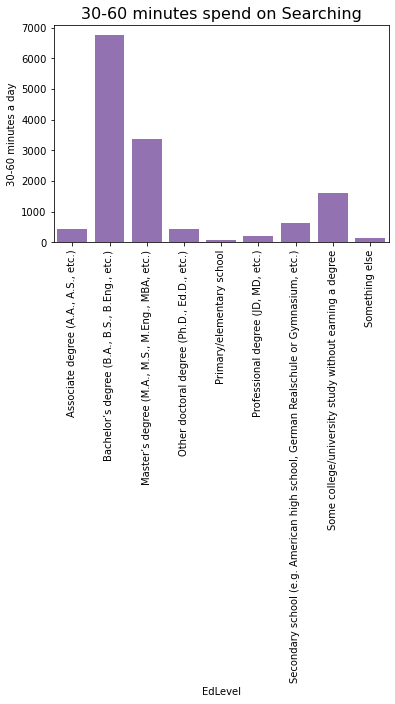

In [38]:
plt.title("30-60 minutes spend on Searching",fontsize=16)
sb.barplot(data=df_ed_ord,x=df_ed_ord.index,y='30-60 minutes a day',color=sb.color_palette()[4])
plt.xticks(rotation=90);

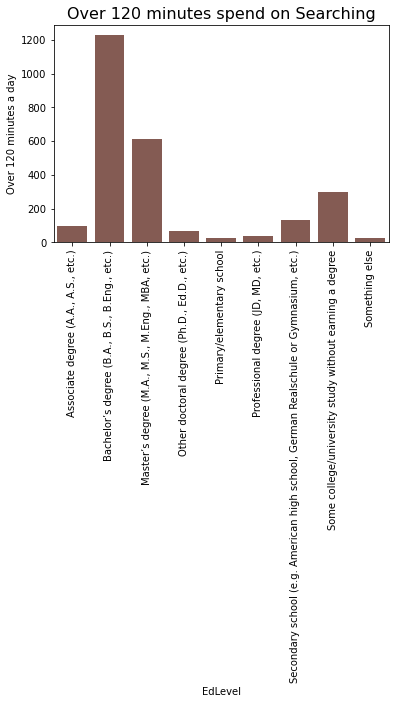

In [39]:
plt.title("Over 120 minutes spend on Searching",fontsize=16)
sb.barplot(data=df_ed_ord,x=df_ed_ord.index,y='Over 120 minutes a day',color=sb.color_palette()[5])
plt.xticks(rotation=90);

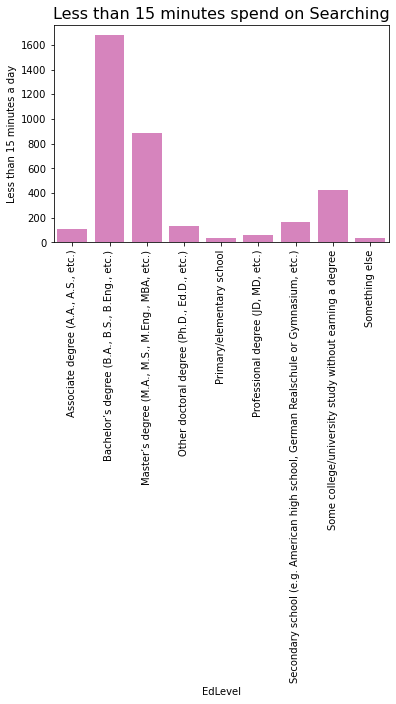

In [40]:
plt.title("Less than 15 minutes spend on Searching",fontsize=16)
sb.barplot(data=df_ed_ord,x=df_ed_ord.index,y='Less than 15 minutes a day',color=sb.color_palette()[6])
plt.xticks(rotation=90);

## The Time Searching for answers or solutions to problems encountered at work was spent the most by the survey respondents with a bachelor's degree followed by repondents with a master's degree.

## Evaluation
The StackOverflow survey 2022 was analysed and the following results obtained for the three questions proposed.
### Findings
1. United States of America is the top country that promotes work from home with 30%, followed by UK, UK at 7%, Germany and Canada at 6% ,India and Brazil at 5%, poland and spain at 3% and France and Australia at 2%.
2. The most preferred language to work with as specified by the Front End Developers are HTML/CSS/Javascript/TypeScript with C# and SQL. The top 5 popular languages preferred by backend developers are Java, GO, Rust, C# and Python.
3. The Developers spend considerable time searching for the answers or solutions to the problems encountered and the pattern that was observed was that the respondents with bachelor's degree spend more time searching followed by respondents with masters degree. 
